In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

In [62]:
df = pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")

In [63]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [65]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [66]:
df.shape

(309, 16)

In [67]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
dtype: int64

In [68]:
df.duplicated().sum()
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [69]:
df.shape

(309, 16)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [71]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)


Column Names:
['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


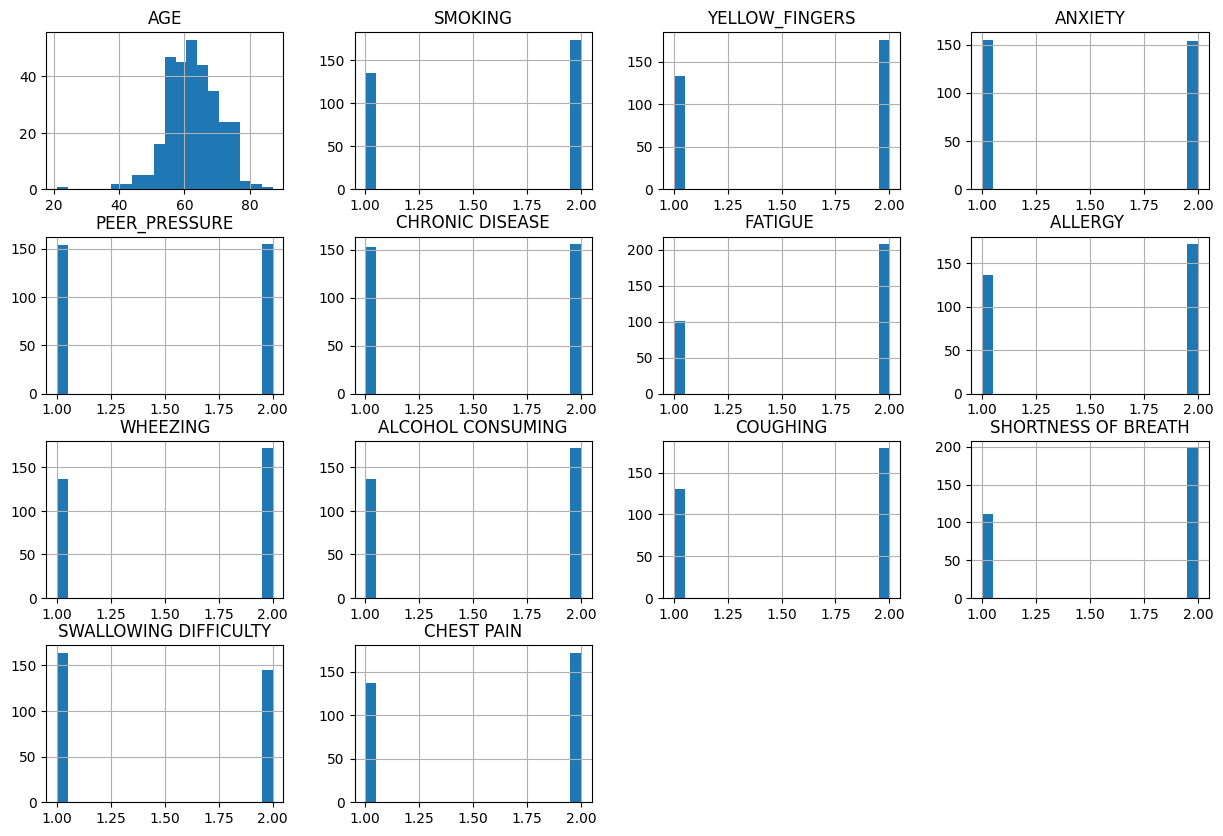

In [72]:
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

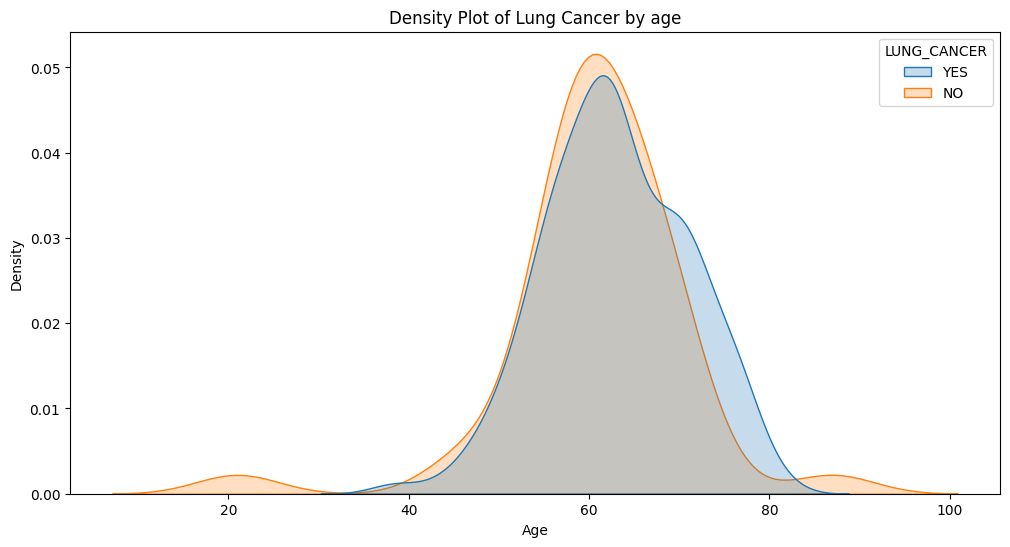

In [73]:
# Make density plots for 'LUNG_CANCER' variables
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='AGE', hue='LUNG_CANCER', common_norm=False, fill=True)
plt.title('Density Plot of Lung Cancer by age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

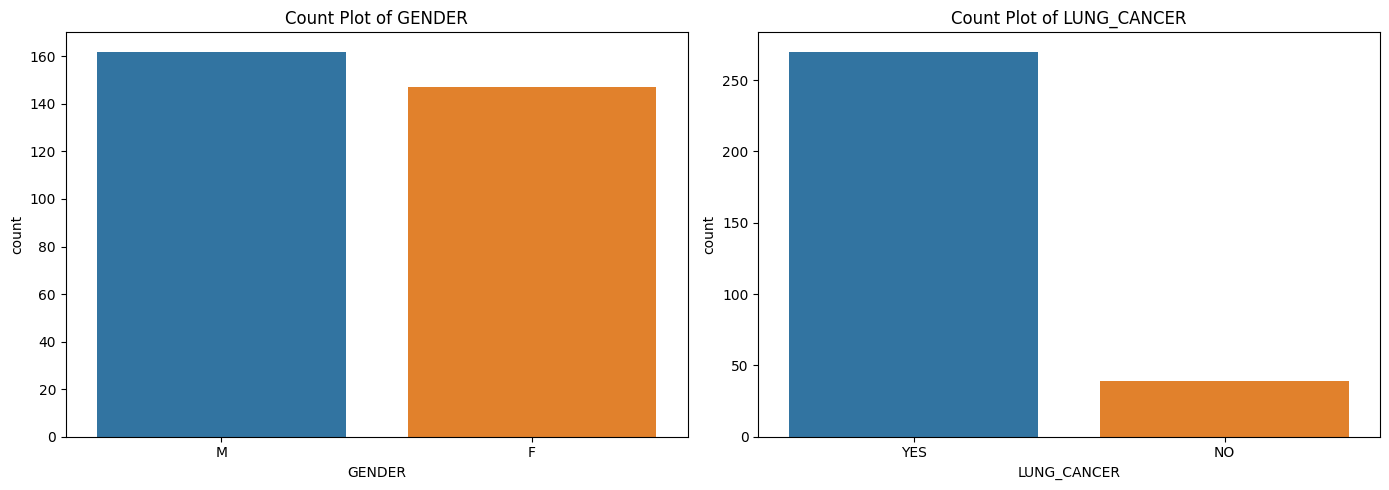

In [74]:
categorical_columns = ['GENDER', 'LUNG_CANCER']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

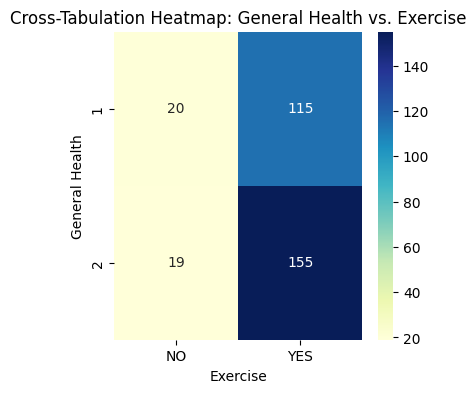

In [75]:
crosstab = pd.crosstab(df['SMOKING'], df['LUNG_CANCER'])
plt.figure(figsize=(4,4))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: General Health vs. Exercise')
plt.xlabel('Exercise')
plt.ylabel('General Health')
plt.show()

In [76]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


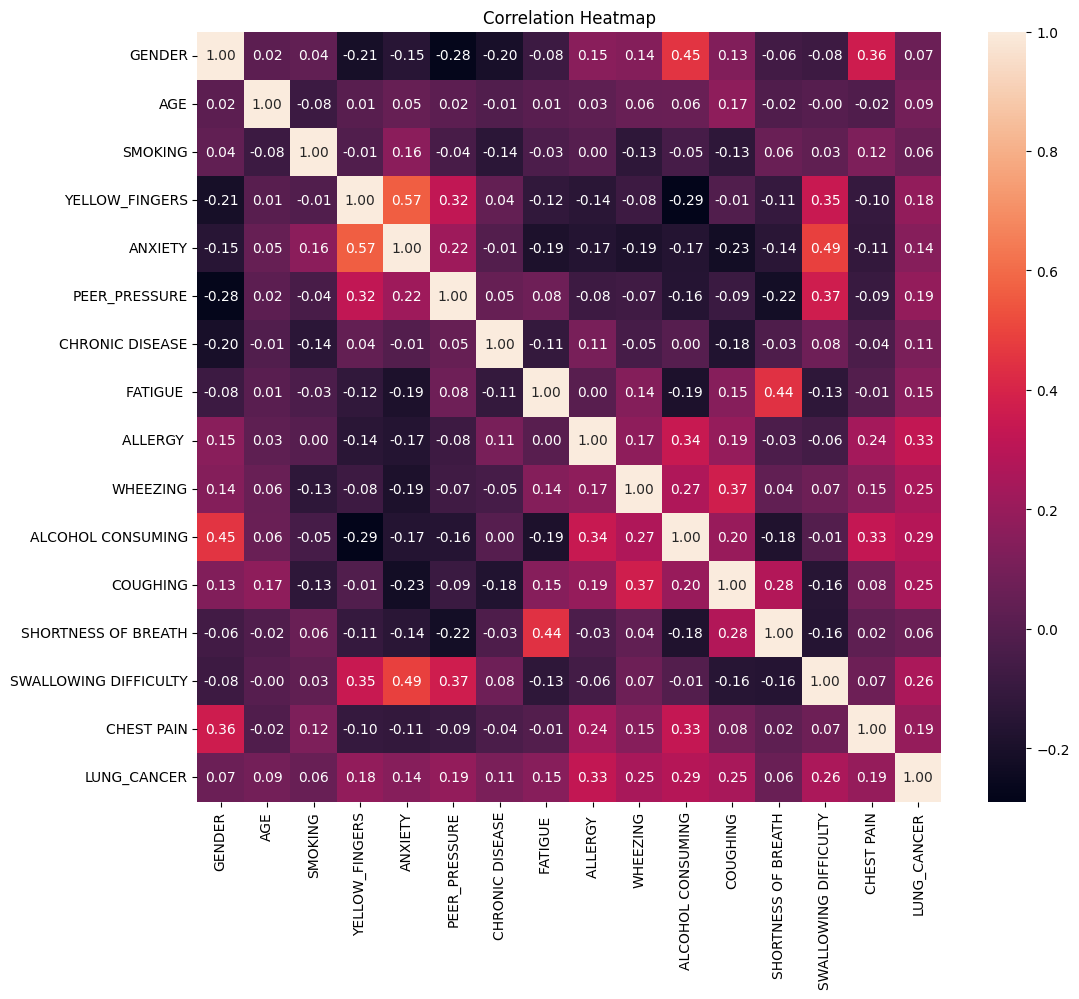

In [77]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [78]:
#CHECK THE CLASS VARIABLE
df_encoded['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

In [79]:

X = df_encoded.drop(columns=['LUNG_CANCER'])  # Features
y = df_encoded['LUNG_CANCER']  # Target variable

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (432, 15)
X_test shape: (108, 15)
y_train shape: (432,)
y_test shape: (108,)


In [80]:
# Define the columns to remove outliers
selected_columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 7


# **LOGISTIC REGRESSION**

In [81]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.93      0.98      0.96        57

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



# **KNN**

In [82]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  # You can add more values to test
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Parameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Model Accuracy: 0.9351851851851852
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.93      0.95      0.94        57

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108



# **SUPPORT VECTOR CLASSIFIER**

In [83]:
# Create a pipeline with the SVC classifier
svc_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],  # You can add more values to test
    'svc__kernel': ['linear', 'rbf', 'poly'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Parameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Model Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.93      0.96      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



# **Decision Tree**

In [84]:
# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],  # You can add more values to test
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Model Accuracy: 0.9351851851851852
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.93      0.95      0.94        57

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108



# **RANDOM FOREST CLASSIFIER**

In [85]:
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # You can add more values to test
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Fit the RandomForestClassifier with the best parameters using the training data
rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Model Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.92      0.98      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



# **XGBOOST CLASSIFIER**

In [86]:
# Create the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # You can add more values to test
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Model Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.93      0.96      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



# **CATBOOST CLASSIFIER**

In [87]:
# Create the CatBoost Classifier
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent')

# Define the parameter grid for GridSearchCV
param_grid = {
    'iterations': [50, 100, 200],  # You can add more values to test
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(catboost_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'depth': 4, 'iterations': 50, 'learning_rate': 0.2, 'subsample': 0.8}
Model Accuracy: 0.9537037037037037
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.93      0.98      0.96        57

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108



# **GRADIENT BOOSTING CLASSIFIER**

In [88]:
# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # You can add more values to test
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_gb.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

print("Best Parameters (Gradient Boosting):", best_params_gb)

# Predict on the test set using the best estimator
y_pred_gb = best_estimator_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Model Accuracy (Gradient Boosting):", accuracy_gb)
print("Classification Report (Gradient Boosting):\n", report_gb)

Best Parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Model Accuracy (Gradient Boosting): 0.9444444444444444
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.93      0.96      0.95        57

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



# **LGBM CLASSIFIER**

In [89]:
# Create the LightGBM Classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_lgbm = GridSearchCV(lgbm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_lgbm.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_lgbm = grid_search_lgbm.best_params_
best_estimator_lgbm = grid_search_lgbm.best_estimator_

print("Best Parameters (LightGBM):", best_params_lgbm)

# Predict on the test set using the best estimator
y_pred_lgbm = best_estimator_lgbm.predict(X_test)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)

print("Model Accuracy (LightGBM):", accuracy_lgbm)
print("Classification Report (LightGBM):\n", report_lgbm)

Best Parameters (LightGBM): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Model Accuracy (LightGBM): 0.9537037037037037
Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.95      0.96      0.96        57

    accuracy                           0.95       108
   macro avg       0.95      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108

